<a href="https://colab.research.google.com/github/wolfinwallst/Financial_Engineering_and_Risk_Management/blob/main/Black_Scholes_MC_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[옵션 #6. 옵션 프리미엄 구하기 실습: MonteCarlo Simulation](https://sine-qua-none.tistory.com/112) 참조함.

1. 유러피안 콜 옵션의 가격을 MC로 구하고
2. exact solution과 비교한다.

result of simulation :12.233
result of exact solution: 12.245
result of s_cum_mean: 12.233


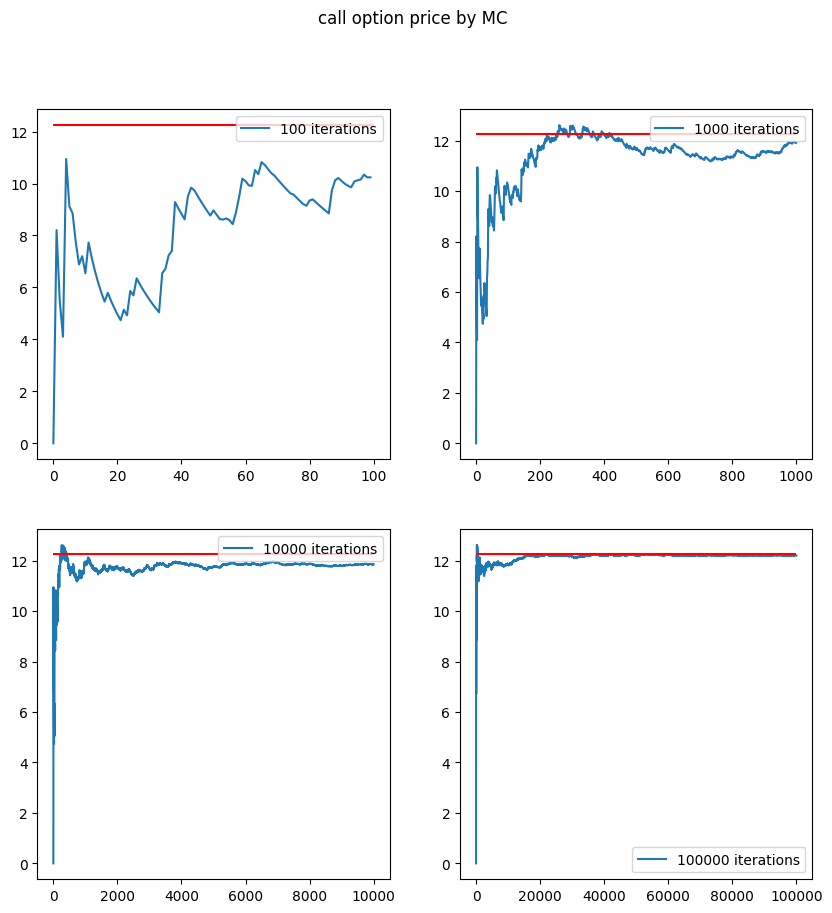

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = norm.cdf

def CallOptionBS(S, K, T, r, q, sigma):
    if T == 0:
        return np.max(S - K, 0)
    else:
        d1 = (np.log(S / K) + (r - q + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        return S * np.exp(-q * T) * N(d1) - K * np.exp(-r * T) * N(d2)


def call_option_by_MC():
    s0 = 100	# 기초자산의 현재가
    vol = 0.3	# 기초자산의 변동성
    r = 0.02	# 무위험이자율
    d = 0.01	# 기초자산의 연속배당률
    maturity = 1	# 콜옵션의 만기
    strike = 100	# 콜옵션의 행사가

    nSimulation = 1000000	# 총 nSimulation 개의 기초자산 만기가격을 생성할 예정
    drift = (r - d - 0.5 * vol ** 2) * maturity	# 기초자산의 drift 항
    volsqrtmat = vol * np.sqrt(maturity)		# 기초자산의 diffusion 항

    rn = np.random.normal(size=nSimulation)		# nSimulation 개의 표준정규분포 난수를 발생시켜
    s_maturity = s0 * np.exp(drift + volsqrtmat * rn)	# nSimulation개의 만기 종가를 생성한다.
    payoff = np.array([np.max([0, s_mat - strike]) for s_mat in s_maturity])
		# 만기종가 각각에 대해 콜옵션 payoff max(S_T-K,0)를 계산하여 payoff라는 배열 만듬
    s_cum_mean = np.cumsum(payoff) / np.arange(1, nSimulation + 1) * np.exp(-r * maturity)
    simulation_result = np.mean(payoff) * np.exp(-r * maturity)
    exact_solution = CallOptionBS(s0, strike, maturity, r, d, vol)

    print('result of simulation :{:.3f}'.format(simulation_result))
    print('result of exact solution: {:.3f}'.format(exact_solution))
    print('result of s_cum_mean: {:.3f}'.format(s_cum_mean[-1]))

    plt.figure(figsize=(10, 10))
    plt.suptitle('call option price by MC')
    sim_list = [100, 1000, 10000, 100000]

    for i in range(len(sim_list)):
        plt.subplot(2, 2, i + 1)
        plt.plot(s_cum_mean[:sim_list[i]], label='{} iterations'.format(sim_list[i]))
        plt.hlines(exact_solution, 0, sim_list[i], color='r')
        plt.legend()

    plt.show()

if __name__ == '__main__':
    call_option_by_MC()